In [ ]:
#| hide
import sys
sys.path.append("/notebooks/katlas")
from nbdev.showdoc import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
from katlas.core import Data
from katlas.feature import *
from katlas.plot import *
from fastbook import *
from tqdm.notebook import tqdm; tqdm.pandas()

/usr/local/lib/python3.9/dist-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.9/dist-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.9/dist-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument 

# Get features from kinase protein

> extract features from kinase protein sequence

With the advancement of language models in protein field, there are many models we can use to extract protein features. In this module, we use several protein large language models to get protein embeddings. 

## ESM

The ESM-2 (Evolutionary Scale Modeling) model is a deep learning model that incorporates evolutionary information by utilizing multiple sequence alignments (MSAs) of related protein sequences. It takes the MSA as input and predicts various properties of the protein, such as secondary structure, solvent accessibility, and contact maps.

In [ ]:
# Download the kinase info
kinase = Data.get_kinase_info()

In [ ]:
# Check biggest kinase
kinase.sort_values(by='length',ascending=False).length[:10]

230    4128
257    3661
9      3056
10     2644
115    1568
292    1321
8      1244
256    1235
166    1188
22     1085
Name: length, dtype: int64

In [ ]:
# due to the computing limit, we can only extract features from proteins with length < 1500
kinase = kinase.query('length<1500').reset_index(drop=True)

Uncheck below to implement. It will take some time to finish extraction. You can skip this step to the next if you'd like to save time

In [ ]:
show_doc(esm_embeddings)

---

### esm_embeddings

>      esm_embeddings (df:pandas.core.frame.DataFrame, seq_colname:str,
>                      model_name:str='esm2_t33_650M_UR50D')

Extract 1280 esmfold2 embeddings from protein sequence.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df | DataFrame |  |  |
| seq_colname | str |  | The name of the column containing the sequences. |
| model_name | str | esm2_t33_650M_UR50D | The name of the ESM model to use for the embeddings. |
| **Returns** | **DataFrame** |  |  |

In [ ]:
# esmfeature = esm_embeddings(kinase,'sequence')

In [ ]:
# esmfeature= pd.concat([kinase[['kinase']],esmfeature.copy()],axis=1) # add a name col
# esmfeature.to_csv('esmfeature.csv',index=False) # save the file

The output file looks like this

In [ ]:
esmfeature = Data.get_esm()

In [ ]:
esmfeature.head(2)

,kinase,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,...,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235,1236,1237,1238,1239,1240,1241,1242,1243,1244,1245,

In [ ]:
esmfeature.shape

(298, 1281)

In [ ]:
info = esmfeature[['kinase']].merge(kinase,'left')

In [ ]:
(info.kinase == esmfeature.kinase).value_counts()

True    298
Name: kinase, dtype: int64

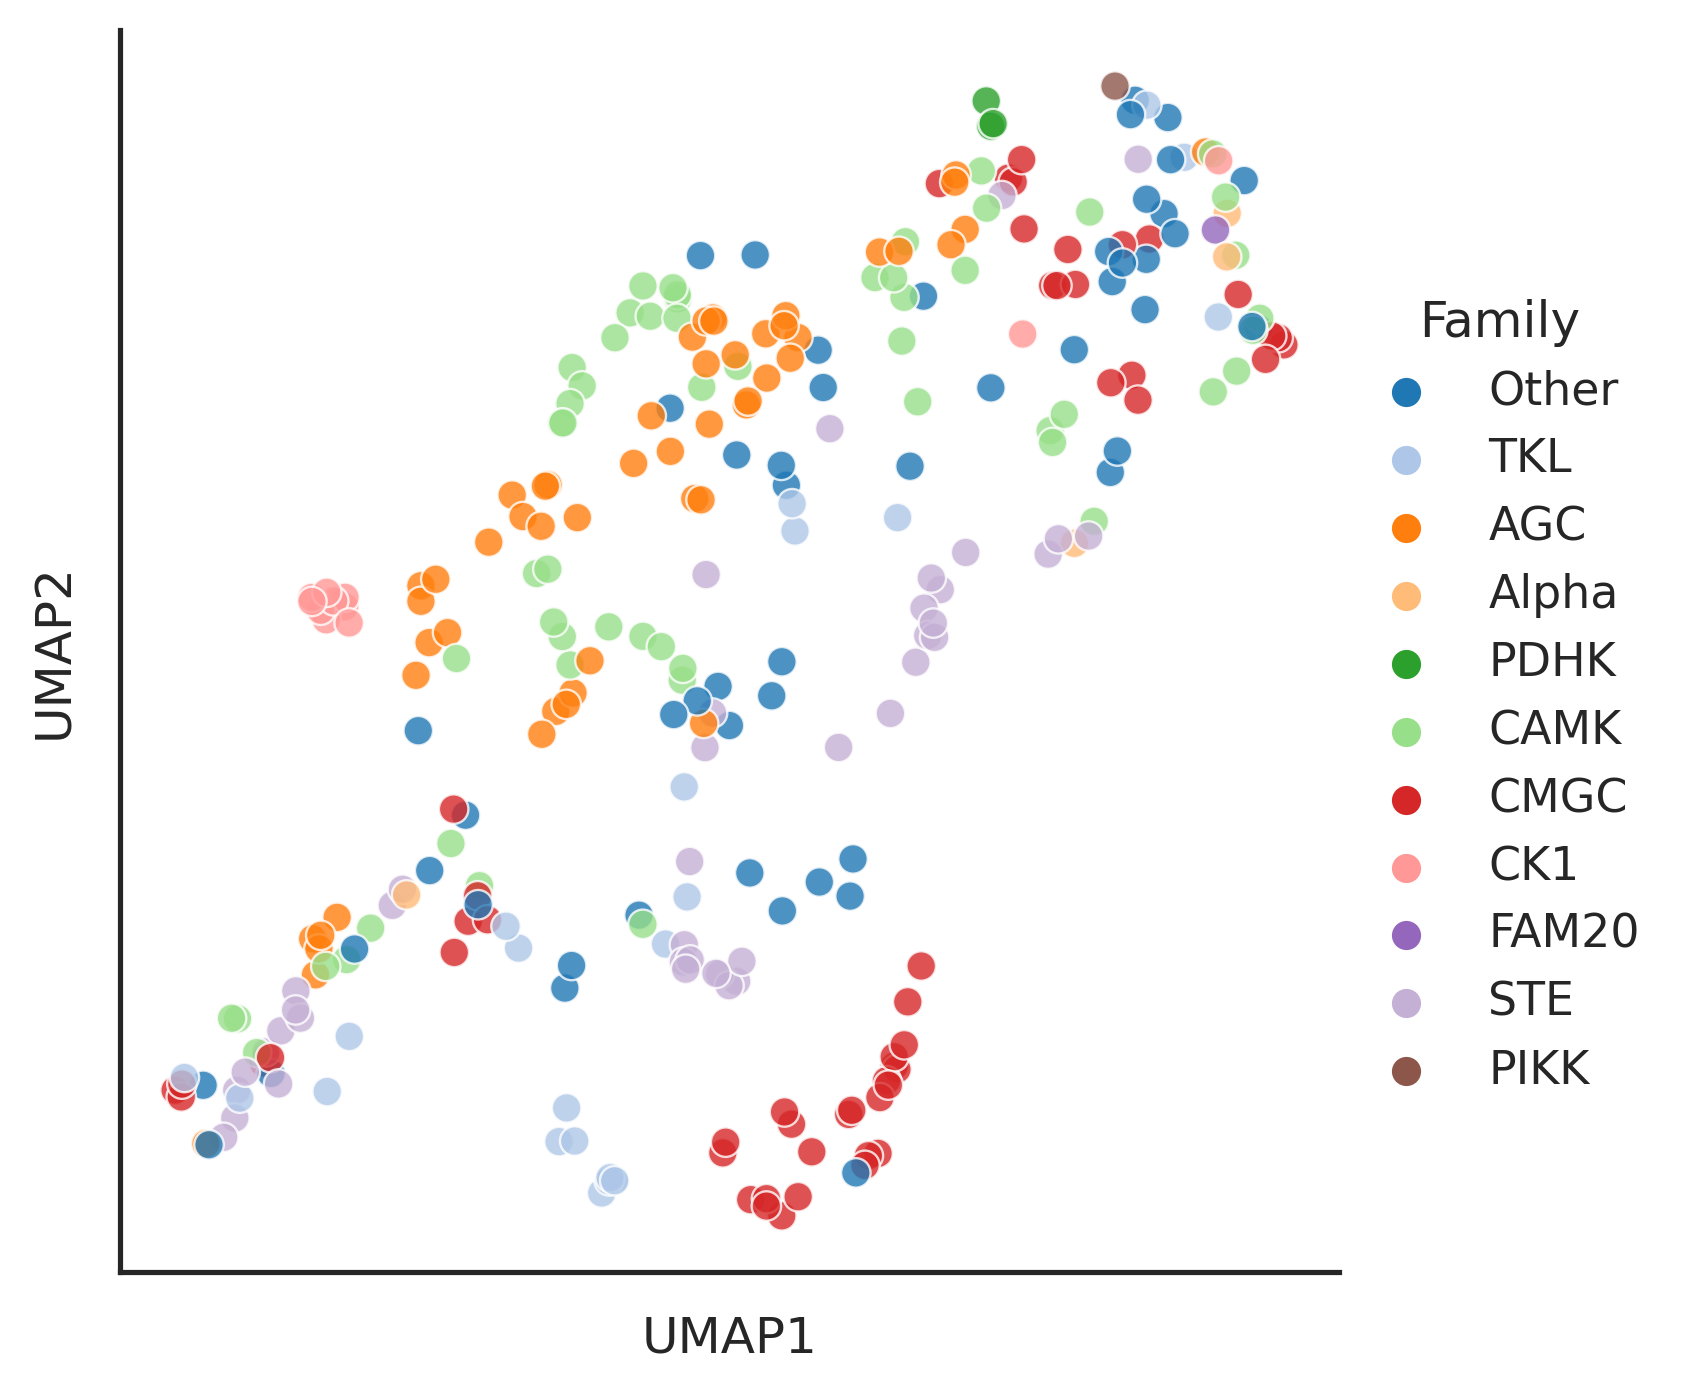

In [ ]:
plot_cluster(esmfeature, hue = info.Family, legend=True, method='umap',complexity=10)

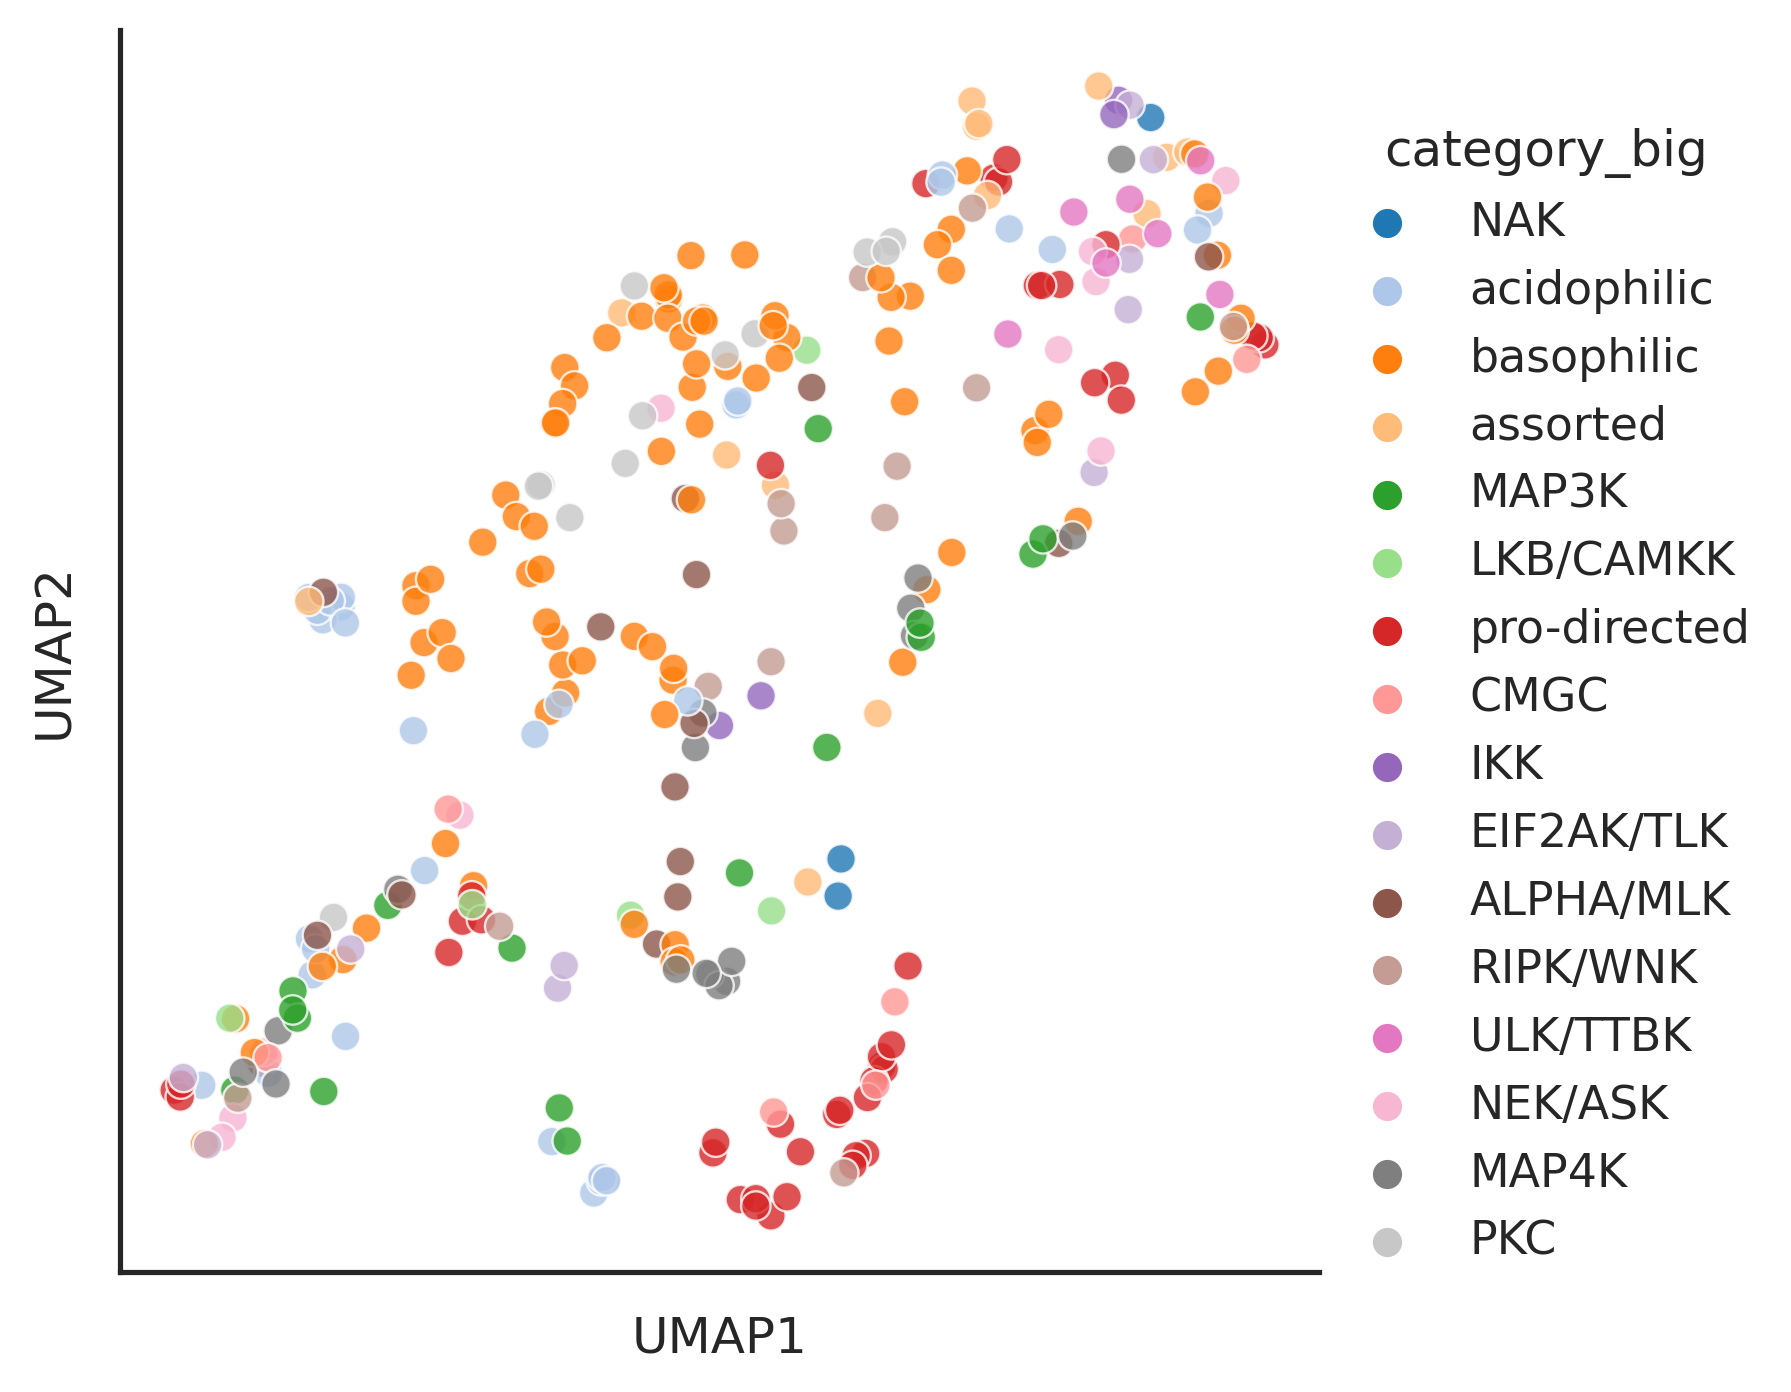

In [ ]:
plot_cluster(esmfeature, hue = info.category_big, legend=True, method='umap',complexity=10)

As the number of features is large (1280), we can reduce the feature number using PCA

In [ ]:
pcafeature = reduce_dim(esmfeature, n_components=32, save = 'pca.pkl') # save the pca for external test use

In [ ]:
# I have one saved, let's take a look
pcafeat = Data.get_esm_pca32()

In [ ]:
pcafeat.head()

,kinase,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20,PCA21,PCA22,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28,PCA29,PCA30,PCA31,PCA32
0,AAK1,-0.529323,-0.529422,-0.277885,0.427082,-0.191013,-0.206378,0.036362,0.283639,-0.033680,-0.345977,-0.320672,0.191720,0.164984,0.105528,-0.102076,0.177409,-0.065808,-0.324508,-0.186942,-0.154722,0.108451,-0.048535,0.059394,-0.144194,-0.068808,-0.030775,-0.177793,-0.132509,0.038955,0.090750,-0.128941,-0.116763
1,ALK2,0.732407,-0.417606,0.178191,1.078289,-0.313006,-0.414630,0.347305,-0.431879,0.072683,-0.011726,0.042879,-0.223155,0.182941,0.092000,-0.012982,0.263073,-0.381594,-0.087094,-0.147170,-0.102771,-0.103955,-0.014753,-0.142062,-0.078317,-0.014130,-0.046977,0.059016,-0.016487,-0.008258,0.051809,0.040164,-0.039615
2,ALK4,0.178194,-0.290457,0.021214,0.945966,-0.204174,-0.398334,0.267993,-0.335838,0.319050,-0.064205,0.103538,-0.103965,0.168369,0.104765,-0.115411,0.241962,-0.282594,-0.104566,0.001614,-0.081152,-0.216893,0.073325,-0.079408,-0.007318,-0.083128,-0.011329,-0.057790,0.063419,0.099156,-0.028403,0.155903,-0.032413
3,ACVR2A,2.080290,0.564376,0.297712,0.662533,-0.129088,-0.305720,0.402668,-0.257512,0.151447,0.168615,0.134715,-0.001692,-0.130807,-0.101865,-0.195282,0.422213,-0.167137,0.078006,0.143682,-0.105916,-0.205958,0.107360,0.045581,-0.011293,-0.030730,-0.130646,-0.110975,-0.093353,0.018720,0.024418,0.078833,-0.002508
4,ACVR2B,1.611847,0.364524,0.519859,0.692123,-0.201059,-0.389519,0.342976,-0.383785,0.102417,0.112628,0.108605,-0.057685,-0.013196,-0.047533,-0.213202,0.357883,-0.174125,0.026739,0.123815,-0.083628,-0.258120,0.152927,-0.028410,0.015682,-0.036445,-0.089838,-0.032784,-0.146611,0.039380,-0.084540,-0.011808,-0.075858


In [ ]:
pcafeat.shape

(298, 33)

## T5

The T5 (Text-To-Text Transfer Transformer) model is a transformer-based model. It consists of a transformer encoder-decoder framework. The encoder processes the input text, and the decoder generates the output text. Both the encoder and decoder are transformer models that use self-attention mechanisms to capture the relationships between words in the input and output sequences.

In [ ]:
from transformers import T5Tokenizer, T5EncoderModel, T5Model
import torch
import re

In [ ]:
df = Data.get_kinase_info()[['kinase','sequence','Family','category','category_big']]

In [ ]:
device = 'cuda'

### T5_XL_UniRef50

UniRef50 is a cluster database from the UniProt Knowledgebase. It groups similar sequences based on 50% sequence identity using the CD-HIT algorithm. 

The Prot T5 is pretrained using this database.

In [ ]:
# Reference: https://github.com/agemagician/ProtTrans/tree/master/Embedding/PyTorch/Advanced
# Load the tokenizer
tokenizer = T5Tokenizer.from_pretrained('Rostlab/prot_t5_xl_half_uniref50-enc', do_lower_case=False)

# Load the model
model = T5EncoderModel.from_pretrained("Rostlab/prot_t5_xl_half_uniref50-enc").to(device)

# Set the model precision based on the device
model.half()

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.75k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/656 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.25G [00:00<?, ?B/s]

T5EncoderModel(
  (shared): Embedding(128, 1024)
  (encoder): T5Stack(
    (embed_tokens): Embedding(128, 1024)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=4096, bias=False)
              (k): Linear(in_features=1024, out_features=4096, bias=False)
              (v): Linear(in_features=1024, out_features=4096, bias=False)
              (o): Linear(in_features=4096, out_features=1024, bias=False)
              (relative_attention_bias): Embedding(32, 32)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=1024, out_features=16384, bias=False)
              (wo): Linear(in_features=16384, out_features=1024, bias=False)
              (dropout): Dropo

In [ ]:
def T5_UR_embeddings(sequence, device = 'cuda'):
    
    seq_len = len(sequence)
    
    # Prepare the protein sequences as a list
    sequence = [" ".join(list(re.sub(r"[UZOB]", "X", sequence)))]
    
    # Tokenize sequences and pad up to the longest sequence in the batch
    ids = tokenizer.batch_encode_plus(sequence, add_special_tokens=True, padding="longest")
    input_ids = torch.tensor(ids['input_ids']).to(device)
    attention_mask = torch.tensor(ids['attention_mask']).to(device)
    
    # Generate embeddings
    with torch.no_grad():
        embedding_rpr = model(input_ids=input_ids, attention_mask=attention_mask)
    
    emb_mean = embedding_rpr.last_hidden_state[0][:seq_len].detach().cpu().numpy().mean(axis=0)
    
    return emb_mean

In [ ]:
series = df['sequence'].progress_apply(T5_UR_embeddings)

  0%|          | 0/303 [00:00<?, ?it/s]

In [ ]:
# output to a dataframe
T5_feature = pd.DataFrame(series.tolist(),index=df.kinase).reset_index()

In [ ]:
T5_feature.to_csv('T5_xl_uniref50.csv',index=False)

#### Visualize

PCA

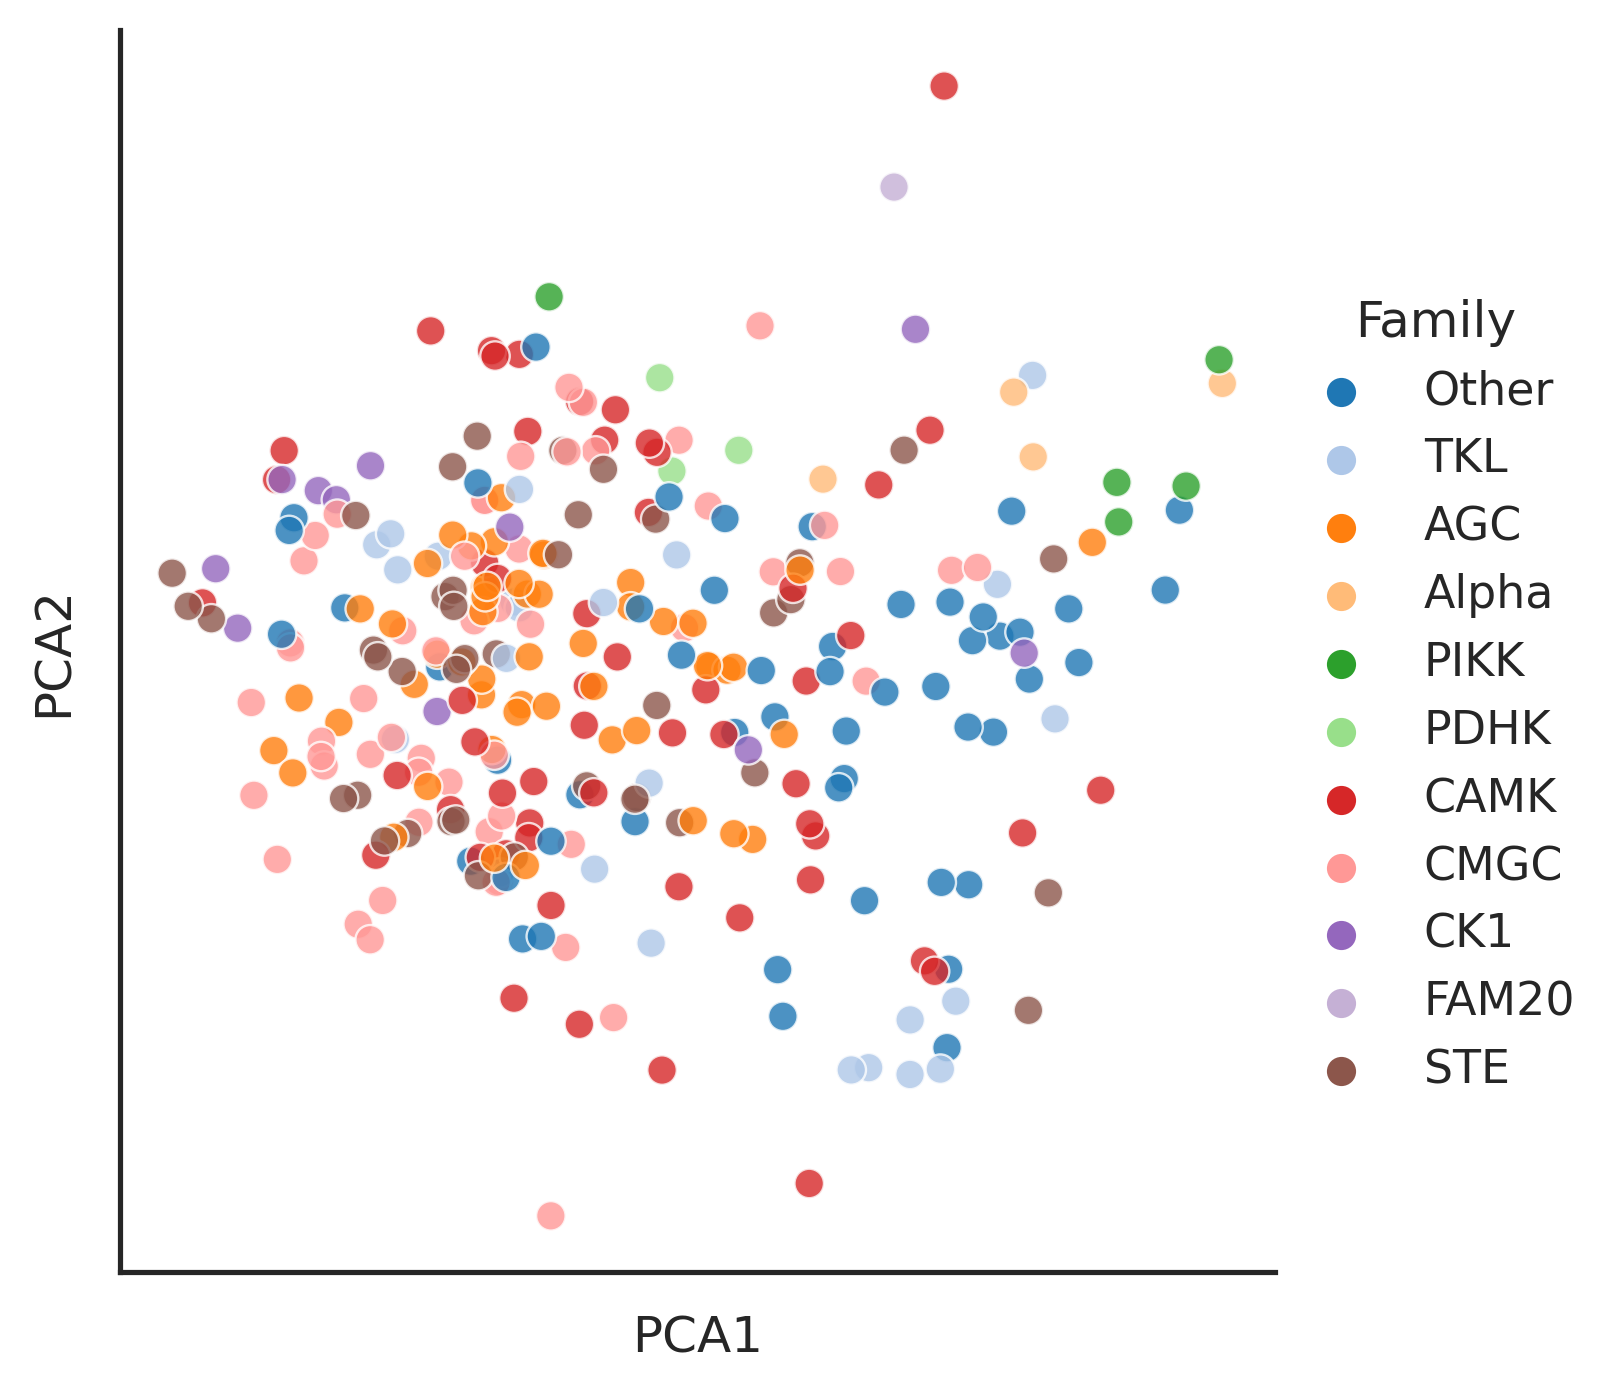

In [ ]:
plot_cluster(T5_feature,'pca',hue=df.Family,legend=True)

UMAP

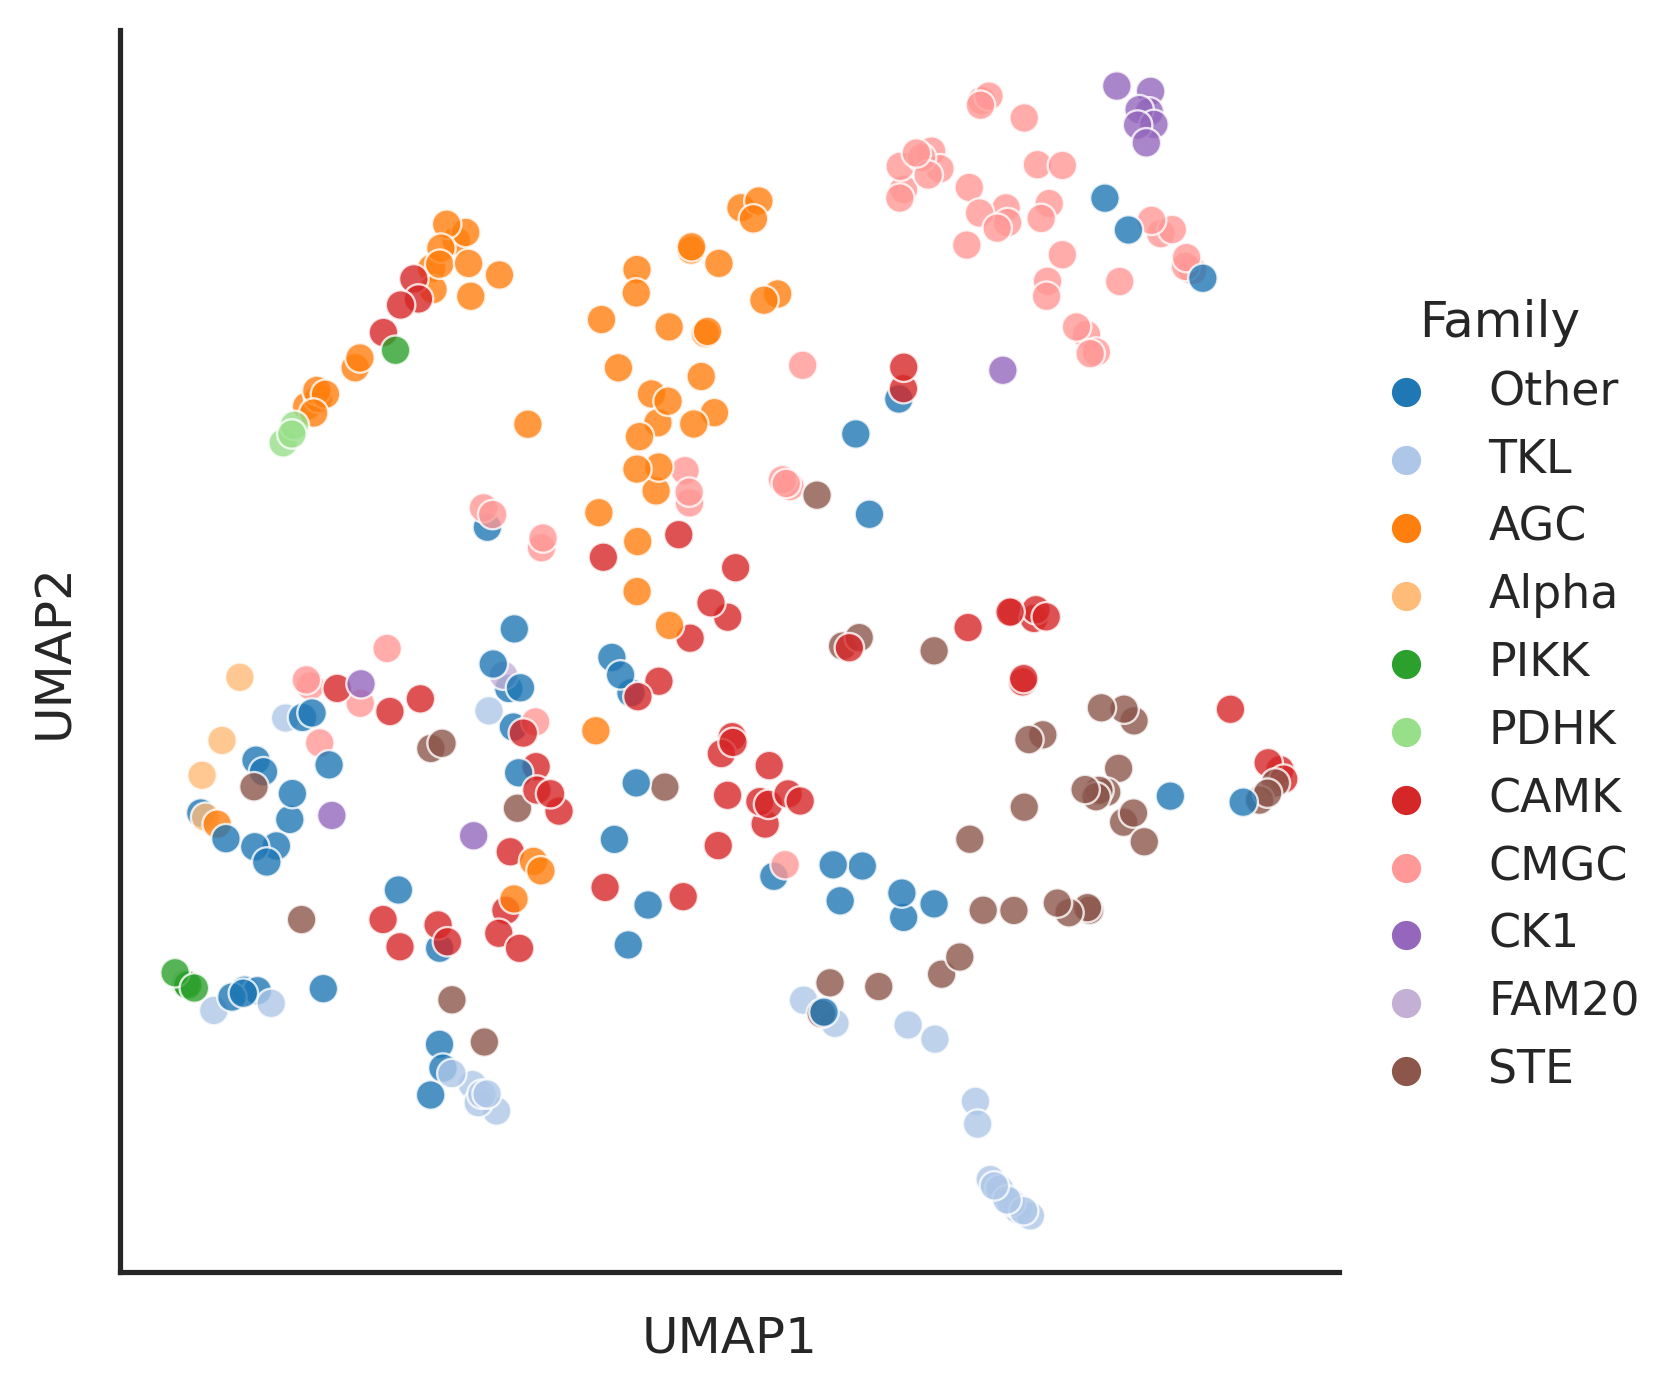

In [ ]:
plot_cluster(T5_feature,'umap',hue=df.Family,legend=True, complexity=12)

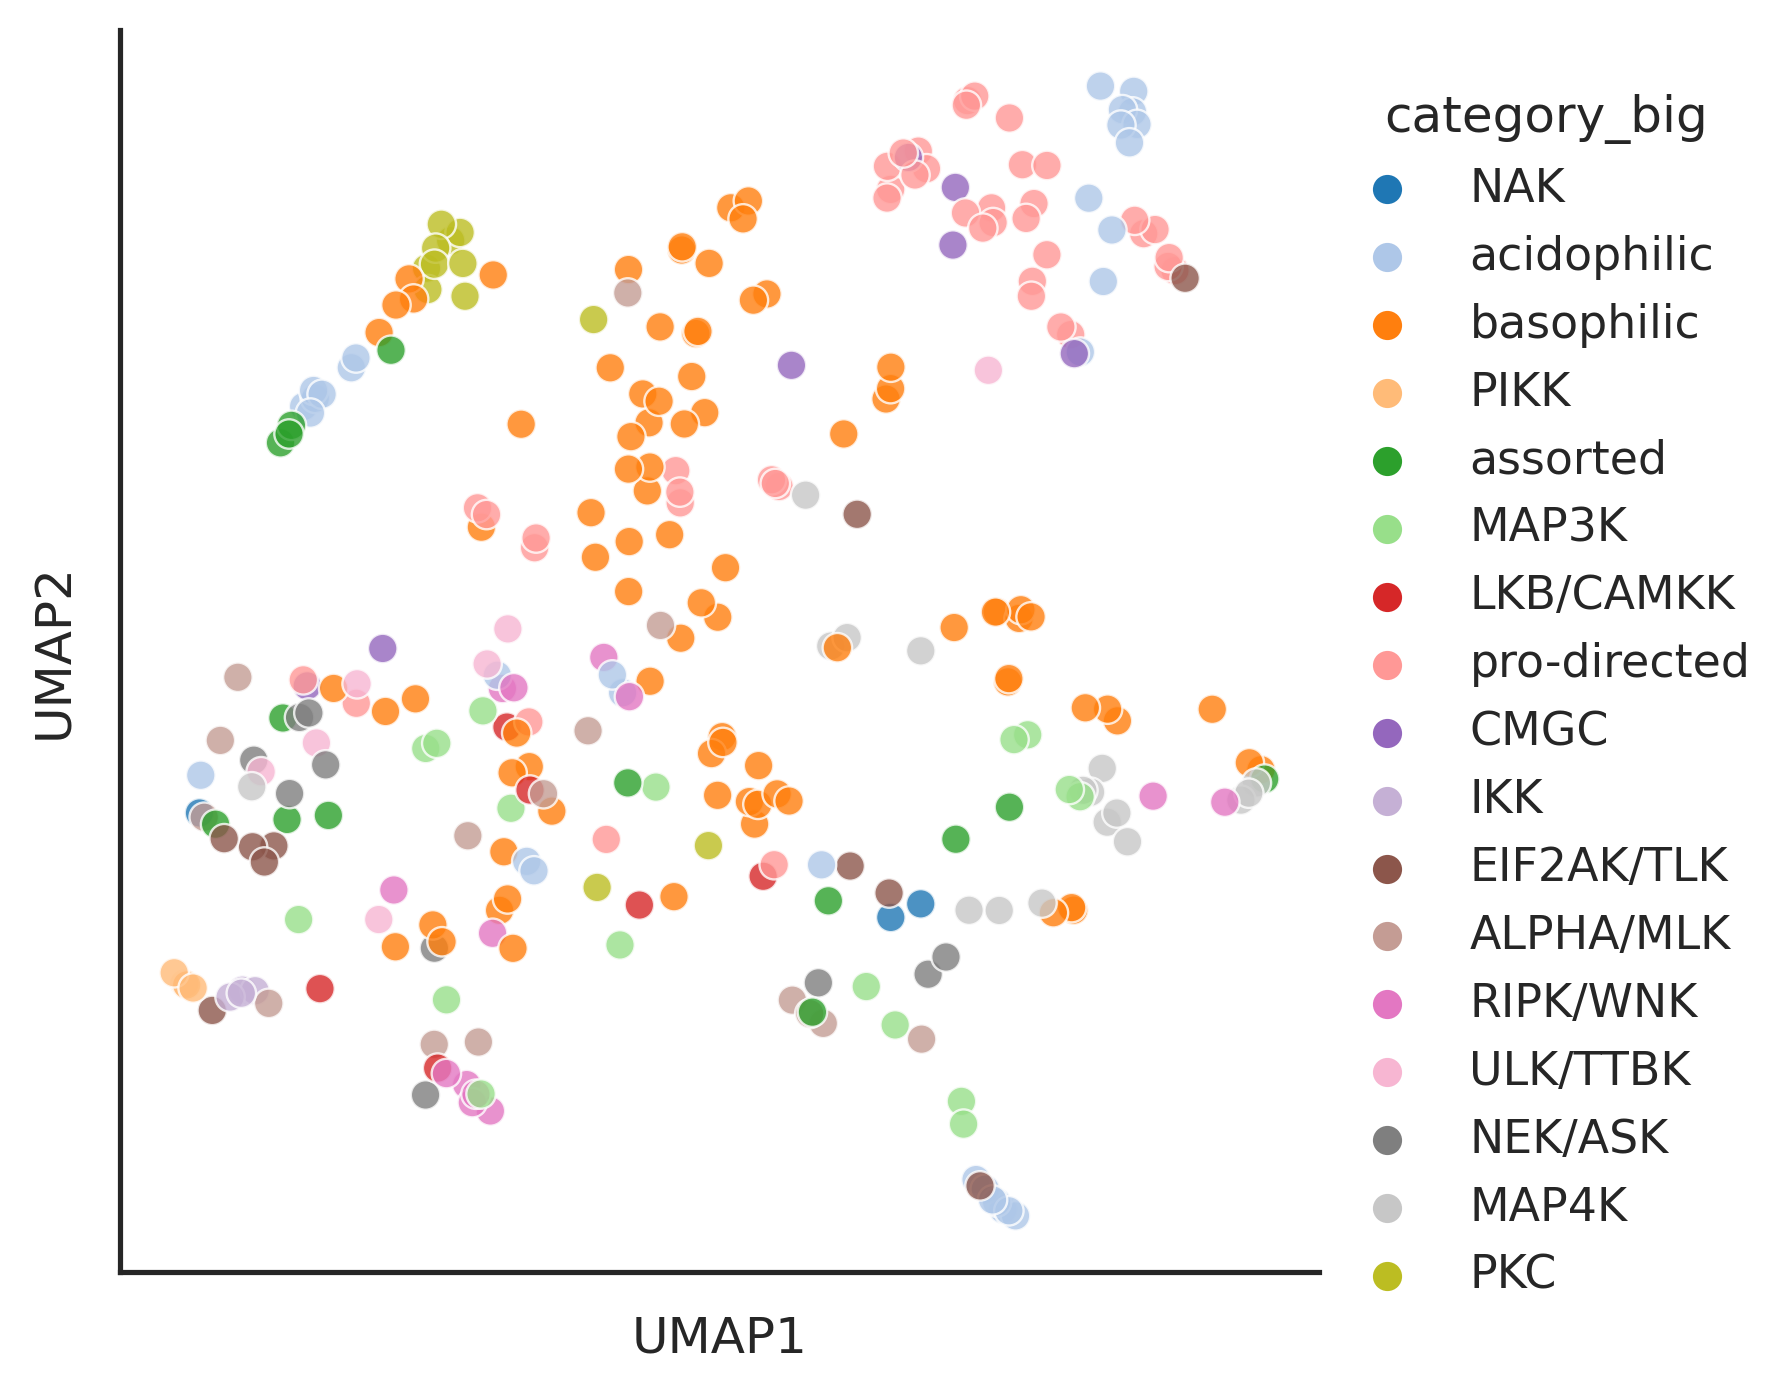

In [ ]:
plot_cluster(T5_feature,'umap',hue=df.category_big,legend=True, complexity=12)

Use UMAP to reduce dimension to 32

In [ ]:
t5_umap32 = reduce_dim(T5_feature, 'umap', 32, complexity = 10)

In [ ]:
t5_umap32.to_csv('t5_umap32.csv',index=False)

### T5_XL_BFD

BFD is a database created by clustering 2.5 billion protein sequences from various sources including Uniprot/TrEMBL+Swissprot.

In [ ]:
import gc
gc.collect()

0

In [ ]:
tokenizer = T5Tokenizer.from_pretrained('Rostlab/prot_t5_xl_bfd', do_lower_case=False)

model = T5Model.from_pretrained("Rostlab/prot_t5_xl_bfd").to(device)

model.eval()

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.74k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/457 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.5G [00:00<?, ?B/s]

T5Model(
  (shared): Embedding(128, 1024)
  (encoder): T5Stack(
    (embed_tokens): Embedding(128, 1024)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=4096, bias=False)
              (k): Linear(in_features=1024, out_features=4096, bias=False)
              (v): Linear(in_features=1024, out_features=4096, bias=False)
              (o): Linear(in_features=4096, out_features=1024, bias=False)
              (relative_attention_bias): Embedding(32, 32)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=1024, out_features=16384, bias=False)
              (wo): Linear(in_features=16384, out_features=1024, bias=False)
              (dropout): Dropout(p=0.

In [ ]:
def T5_bfd_embeddings(sequence, device = 'cuda'):
    
    seq_len = len(sequence)
    
    # Prepare the protein sequences as a list
    sequence = [" ".join(list(re.sub(r"[UZOB]", "X", sequence)))]
    
    # Tokenize sequences and pad up to the longest sequence in the batch
    ids = tokenizer.batch_encode_plus(sequence, add_special_tokens=True, padding="longest")
    input_ids = torch.tensor(ids['input_ids']).to(device)
    attention_mask = torch.tensor(ids['attention_mask']).to(device)
    
    # Generate embeddings
    with torch.no_grad():
        embedding_rpr = model(input_ids=input_ids, attention_mask=attention_mask, decoder_input_ids = input_ids)
    
    emb_mean = embedding_rpr.last_hidden_state[0][:seq_len].detach().cpu().numpy().mean(axis=0)
    
    return emb_mean

As our RAM is limited, we need to get sequence below 1000

In [ ]:
df['length'] = df.sequence.apply(len)

In [ ]:
df = df.query('length < 1000')

In [ ]:
series = df['sequence'].progress_apply(T5_bfd_embeddings)

  0%|          | 0/293 [00:00<?, ?it/s]

In [ ]:
# output to a dataframe
T5_feature = pd.DataFrame(series.tolist(),index=df.kinase).reset_index()

In [ ]:
T5_feature.shape

(303, 1025)

In [ ]:
T5_feature.to_csv('T5_xl_bfd.csv',index=False)

In [ ]:
T5_feature= pd.read_csv('T5_xl_bfd.csv')

In [ ]:
df2 = df.query('length < 1000')

#### Visualize

Since PCA plot cannot reflect the cluster very well, we use umap; after trying different n_neigbors (complexity) value, we found 10 is the best; the lower, the more clustered the dots

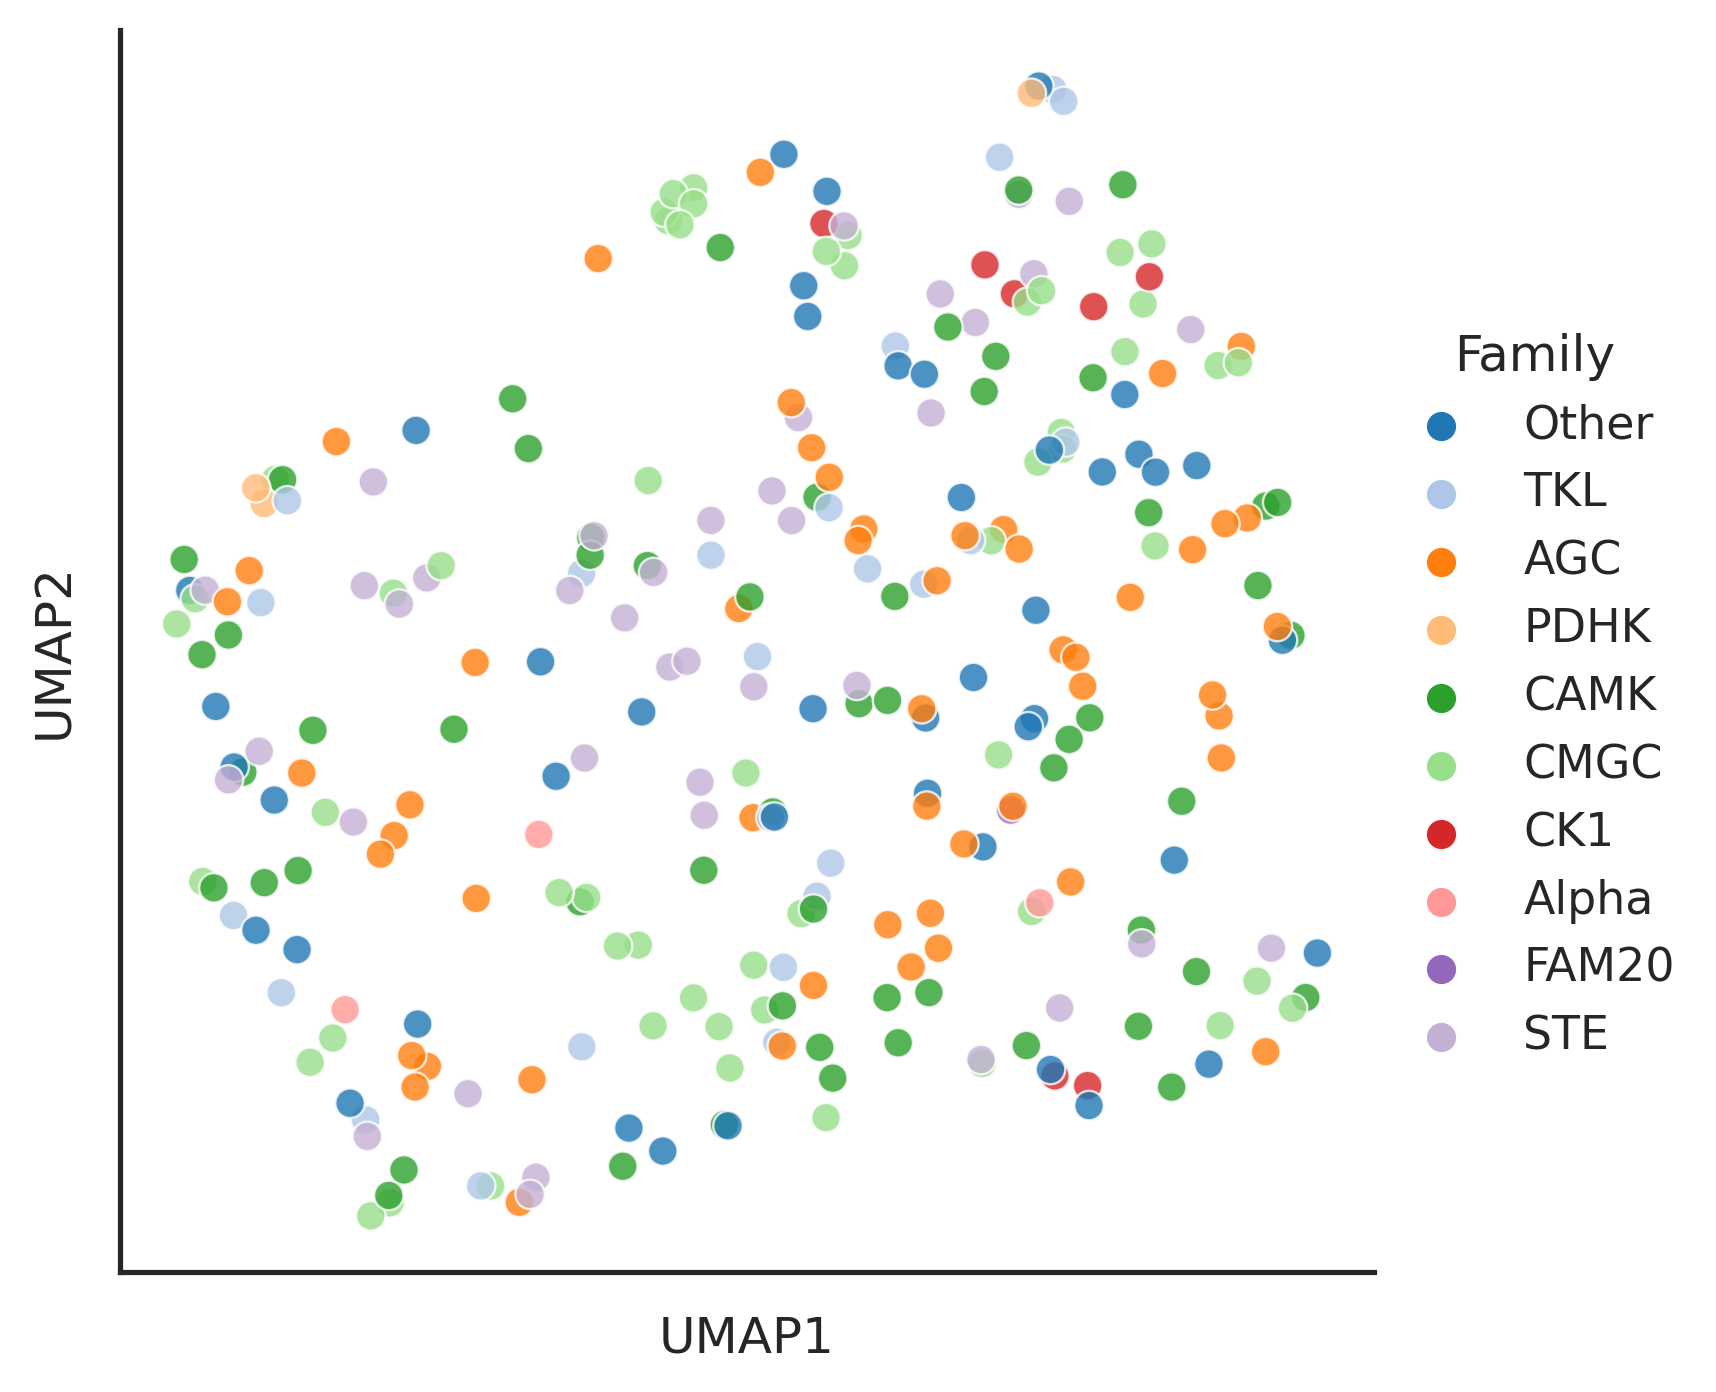

In [ ]:
plot_cluster(T5_feature,'umap',hue=df.Family,legend=True, complexity=10)

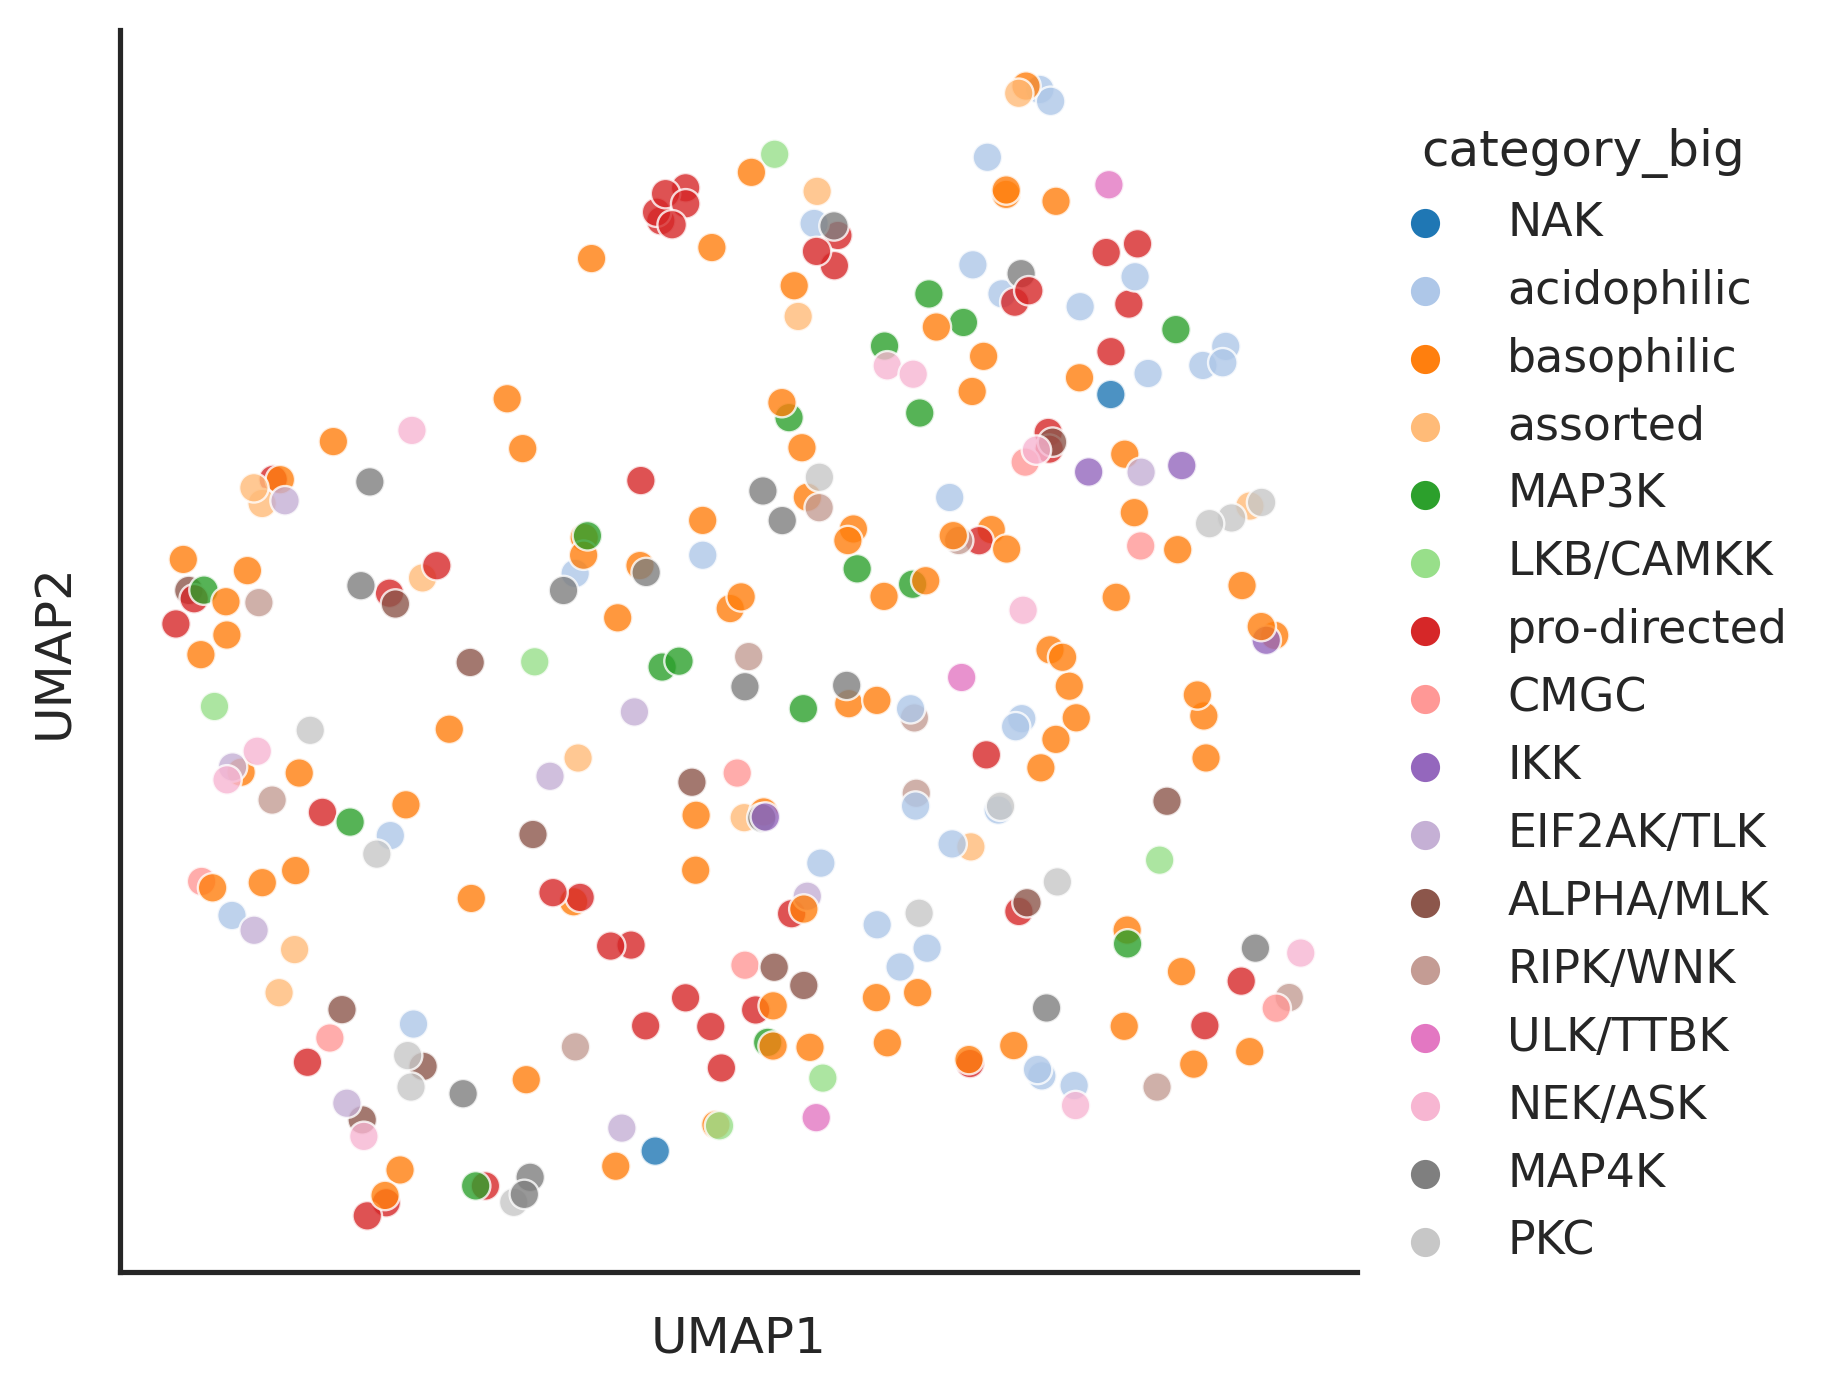

In [ ]:
plot_cluster(T5_feature,'umap',hue=df.category_big,legend=True, complexity=10)